#**CheckPoint de CyberSegurança**
##**Missão**: Construir uma aplicação que funcione como se fosse um cadastro de uma pessoa em um app de banco, ou seja construir uma forma da IA entender o que tem na self tirada pelo usuario.
---
###**Objetivos** para aprovação do cadastro:
*   Realizar o Captcha
*   Ter duas pessoas na self ou Self segurando uma (maçã,caneta ou um relogio) 
---
####**Resumo da Finalização:** Após construir a aplicação, percebi alguns erros ao subir a imagem no Streamlit, eu consigo subir arquivos que sejam menores que (7Kb), percebi que esse erro erá do proprio Ngrok ou Streamlit, que dizia aceitar arquivos de até 200mb, entretanto só estava conseguindo receber menores. Mas ao identificar esse erro, eu fiz um tratamento nas imagens de teste as deixando com menos de (7Kb), para poder testar a acuracia do programa, decidi utilizar o Detectron2, ou sejá uma IA já treinada, consegui com exito otimos resultados.

**Erro encontrado**: ( Error: Request failed with status code 500 
)

**Soluação**: Realizar o Deploy em plataformas como o Heroku


---
##Caixas de resposta:

Primeira caixa, ela aparece enquanto o usuario não digitar o Captcha, ou digitar errado:

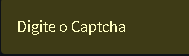

Caixa após acertar o Captcha:

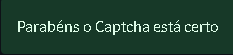

Caixa que indica, que a foto passou pelos criterios de aprovação da IA:

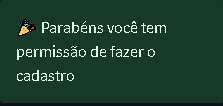

Caixa que indica, que a foto não conseguiu passar pelos criterios de aprovação da IA:

j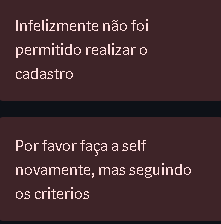

---

#Imports para o Detectron 2


In [1]:
!pip install pyyaml==5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 274 kB 34.2 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=dc609d15def6e162e5fe397a8f9795818bb7f60bccdca146a0d7187e169e122e
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask 2022.2.0 requires pyyaml>=5.3.1, but you have pyyaml 5.1 which is incompatible.


In [2]:
!pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 735.4 MB 16 kB/s 
     |████████████████████████████████| 12.8 MB 36.1 MB/s 
     |████████████████████████████████| 7.6 MB 18.1 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully uninstalled torch-1.12.1+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.13.1+cu113
    Uninstalling torchvision-0.13.1+cu113:
      Successfully uninstalled torchvision-0.13.1+cu113
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.12.1+cu113
    Uninstalling torchaudio-0.12.1+cu113:
      Successfully uninstalled torchaudio-0.12.1+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed.

In [3]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

1.7.1+cu101
True


In [4]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
     |████████████████████████████████| 6.1 MB 2.4 MB/s 
     |████████████████████████████████| 151 kB 10.8 MB/s 
     |████████████████████████████████| 130 kB 29.7 MB/s 
     |████████████████████████████████| 79 kB 5.9 MB/s 
     |████████████████████████████████| 50 kB 7.2 MB/s 
     |████████████████████████████████| 843 kB 71.7 MB/s 
     |████████████████████████████████| 117 kB 59.7 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220512-py3-none-any.whl size=61288 sha256=c9efcca7e7942e790f8adb3c3e936ad72ec022d8373513fe1b60bb7f665a6971
  Stored in directory: /root/.cache/pip/wheels/68/20/f9/a11a0dd63f4c13678b2a5ec488e48078756505c7777b75b29e
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144575 sha256=43470054cbb42abab3f

#Importações Necessarias

In [5]:
!pip install -q pyngrok

     |████████████████████████████████| 745 kB 33.6 MB/s 


In [6]:
!pip install -q streamlit

     |████████████████████████████████| 9.1 MB 26.5 MB/s 
     |████████████████████████████████| 235 kB 66.1 MB/s 
     |████████████████████████████████| 78 kB 7.8 MB/s 
     |████████████████████████████████| 181 kB 72.8 MB/s 
     |████████████████████████████████| 4.7 MB 55.9 MB/s 
     |████████████████████████████████| 164 kB 61.8 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 51 kB 7.1 MB/s 


In [7]:
!pip install -q streamlit_ace

     |████████████████████████████████| 3.6 MB 27.2 MB/s 


In [8]:
!pip install captcha

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 102 kB 33.7 MB/s 


In [9]:
from pyngrok import ngrok

#Codigo principal

In [10]:
%%writefile app.py
import torch
import numpy as np
import pandas as pd
import streamlit as st
from PIL import Image, ImageOps
from captcha.image import ImageCaptcha
import cv2
from google.colab.patches import cv2_imshow
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from PIL import Image, ImageOps


#Função de teste: Essa função contem a IA do Detectron2, que verifica se 
#a imagem atende aos requisitos, e gera uma lista com oque achou.
def teste(image):
  image = cv2.imread(image)
  cfg = get_cfg()
  cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
  cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")
  cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.6
  predictor = DefaultPredictor(cfg)
  outputs = predictor(image)
  outputs["instances"].pred_classes
  outputs["instances"].pred_boxes
  achados = []
  for data in outputs["instances"].pred_classes:
    num = data.item()
    lista = (MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes[num])
    if 'person' in lista:
      x = lista
      achados.append(x)
    if 'apple' in lista:
      x = lista
      achados.append(x)
    if 'clock' in lista:
      x = lista
      achados.append(x)
    if 'pen' in lista:
      x = lista
      achados.append(x)
  return achados


def predImage(image):
  image = cv2.imread(image)
  cfg = get_cfg()
  cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
  cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")
  cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.6
  predictor = DefaultPredictor(cfg)
  outputs = predictor(image)
  outputs["instances"].pred_classes
  outputs["instances"].pred_boxes
  viz = Visualizer(image[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]))
  outputs = viz.draw_instance_predictions(outputs["instances"].to("cpu"))
  filename = 'result.jpg'
  cv2.imwrite(filename, outputs.get_image()[:,:,::-1])
  cv2.waitKey(0)
  cv2.destroyAllWindows()
  


#Função de Criação do Captcha: Essa função cria o captcha de forma aleatoria.
def criandoCaptcha():
  captcha_text = '12teste'
  image_info = ImageCaptcha(width=250, height=100)
  source = image_info.generate(captcha_text)
  image_info.write(captcha_text, 'Captcha.png')
  imagemCaptcha = cv2.imread("./Captcha.png")
  return imagemCaptcha



#Função de teste do Captcha: Essa função testa se o usuario escreveu de forma
#correta o que está escrito na imagem do Captcha.
def captchaTeste(item):
  captcha_text = '12teste'
  if item == captcha_text:
    st.success("Parabéns o Captcha está certo")
    return True
  elif item != captcha_text:
    st.warning("Digite o Captcha")
    return False


#Função Principal: Essa função contem todo o codigo principal.
def main():
  st.set_page_config(layout="centered", page_icon="💬", page_title="Banco com defesa de IA")
  st.title("💬 Banco com defesa de IA")
  st.markdown(
    "#### Para realização do seu cadastro no nosso APP, porfavor passe por essas seguranças"
)
  esquerda, direita = st.columns(2)
  # formulario esquerda
  formEsq = esquerda.form("template_formEsq")
  formEsq.markdown("### Captcha")
  botaoCap = formEsq.form_submit_button("Clique aqui para ver o captcha")
  if botaoCap:
    formEsq.image(criandoCaptcha(), caption = '',use_column_width='always')

  # formulario direita
  formDir = direita.form("template_formDir")
  formDir.markdown("### Digite aqui")
  escrita = formDir.text_input('')
  botaoVer = formDir.form_submit_button("Verificar")
  formDir.markdown("")
  formDir.markdown("")
  x = captchaTeste(escrita)
  if x == True:
    st.markdown("#### Por favor, faça upload de uma self")
    st.write("Criterios: Ter duas pessoas na self ou Self segurando uma (maçã,caneta ou um relogio)")
    imagem = st.file_uploader("", type=['png','jpeg','jpg'])
    ladoEsq, meio ,ladoDir = st.columns(3)
    if imagem is not None:
      img = Image.open(imagem)
      ladoEsq.image(img)
      with open(imagem.name, mode = "wb") as f:
        f.write(imagem.getbuffer())
      predImage(imagem.name)
    verificar = meio.button("Verificar a self escolhida")
    if verificar:
      img_ = Image.open("result.jpg")
      ladoDir.image(img_)
      try:
        lista = teste(imagem.name)
        if ('person' in lista and 'apple' in lista) or ('person' in lista and 'clock' in lista) or ('person' in lista and 'pen' in lista) or (lista.count('person') >= 2):
          meio.success("🎉 Parabéns você tem permissão de fazer o cadastro")
          st.balloons()
        else:
          meio.error("Infelizmente não foi permitido realizar o cadastro")
          meio.error("Por favor faça a self novamente, mas seguindo os criterios")
      except:
        st.warning("Por favor, faça upload da sua self")

if __name__=='__main__': 
  main()

Writing app.py


In [15]:
!streamlit run app.py & npx localtunnel --port 8501

2022-09-06 23:38:04.537 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.143.179.4:8501

npx: installed 22 in 4.434s
your url is: https://social-webs-shave-34-143-179-4.loca.lt
2022-09-06 23:39:06.782 [Checkpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x/139173657/model_final_68b088.pkl ...
2022-09-06 23:39:06.783 Downloading https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x/139173657/model_final_68b088.pkl ...
2022-09-06 23:39:06.783 Downloading from https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x/139173657/model_final_68b088.pkl ...
model_final_68b088.pkl: 421MB [00:24, 17.5MB/s]               
2022-09-06 23:39:30.815 Successfully downloaded /root/.torch/iopath_cache/detectron2/COCO-Detection/faster_rcnn_X_101_32x8d_FPN_